## Crime Analysis - Seattle and San Francisco

## Primary Conclusion: Crime counts vary widely based on day, time, and area within the city, but similar patterns exist for all of these across both cities

In this iPython notebook, I examine police report data for Summer 2014, from Seattle and from San Francisco.

The questions I set out to answer included:
1. What are the safest / most dangerous days and times in these cities? How do the cities compare?
2. What are the safest / most dangerous areas in these cities? How do the cities compare?
3. What types of crimes are committed in each city? Does it differ by city area?

Note: I chose to use Python/Matplotlib/Pandas for this analysis, but I did not have experience in any of these before this course. I spent quite a bit of time learning these to the point where I could do a good level of data analysis for this assignment. I am sure there are better ways to do some of the things I did; please forgive any sub-optimized code.  

First, I imported the libraries I would use.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

I then loaded the two CSV files into two dataframes.

In [30]:
seattle_incidents = pd.read_csv('seattle_incidents_summer_2014.csv', delimiter=',')
sanfran_incidents = pd.read_csv('sanfrancisco_incidents_summer_2014.csv', delimiter=',')

I examined the data in each to get a sense of it.

In [31]:
seattle_incidents.head()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,NaN,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014


In [32]:
sanfran_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


In [33]:
seattle_incidents.describe()

,RMS CDW ID,General Offense Number,Offense Code Extension,Census Tract 2000,Longitude,Latitude,Month,Year
count,3.277900e+04,3.277900e+04,32779.000000,32645.000000,32779.000000,32779.000000,32779.000000,32779.0
mean,5.786503e+05,2.019999e+09,4.199793,6737.664956,-114.680394,44.646274,6.980933,2014.0
std,4.876735e+05,1.111669e+09,12.028941,3300.797625,29.620933,11.531858,0.812021,0.0
min,1.247000e+04,2.015135e+07,0.000000,100.100100,-122.425315,0.000000,6.000000,2014.0
25%,4.724550e+04,2.014207e+09,0.000000,4600.100000,-122.346076,47.580045,6.000000,2014.0
50%,9.998590e+05,2.014243e+09,0.000000,7500.400700,-122.328713,47.614196,7.000000,2014.0
75%,1.030116e+06,2.014277e+09,1.000000,9200.201300,-122.307333,47.664051,8.000000,2014.0
max,1.125252e+06,2.014142e+11,98.000000,26500.100200,0.000000,47.749606,8.000000,2014.0


As part of my analysis, I knew I wanted to normalize crime counts by area, so that larger districts would not appear to be more dangerous. In order to do that I needed to first enumerate all of the areas/districts in the data sets and then do research into the area (in square miles) of each.

In [34]:
seattle_incidents['District/Sector'].value_counts()

M     2642
K     2379
B     2338
N     2333
E     2255
J     2204
U     2160
D     2063
L     1982
R     1841
Q     1805
C     1680
S     1607
F     1594
G     1394
W     1324
O     1081
99      40
Name: District/Sector, dtype: int64

In [35]:
sanfran_incidents['PdDistrict'].value_counts()

SOUTHERN      5739
MISSION       3700
NORTHERN      3589
CENTRAL       3513
BAYVIEW       2725
INGLESIDE     2378
TENDERLOIN    2257
TARAVAL       1853
PARK          1693
RICHMOND      1546
Name: PdDistrict, dtype: int64

Seattle had a few records labeled '99' which I'm guessing meant that the area was out of Seattle or perhaps unknown. This was a very small part of the data (0.1%) which I felt could be safely ignored.

For the other areas in both cities I did research into land area. For Seattle, I first mapped the "districts", which correspended better with San Francisco in terms of quantity and size, and for which i could find land area information.

I researched the info from various pages online and created CSV files for the tables I would need, then imported them into dataframes.

In [43]:
seattle_districts = pd.read_csv('seattle_districts.csv', delimiter=',')
seattle_precincts = pd.read_csv('seattle_precincts.csv', delimiter=',')
sanfran_precincts = pd.read_csv('sanfran_precincts.csv', delimiter=',')

In [29]:
seattle_districts

,District,Precinct
0,M,West
1,K,West
2,B,North
3,N,North
4,E,East
5,J,North
6,U,North
7,D,West
8,L,North
9,R,South


I joined all of my Seattle dataframes together to make a single flat table for further analysis, and did the same for San Francisco.

In [36]:
seattle_full = pd.merge(pd.merge(seattle_incidents,seattle_districts,left_on='District/Sector', right_on='District'),
                        seattle_precincts,left_on='Precinct',right_on='Name')

In [37]:
seattle_full


,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,...,Census Tract 2000,Longitude,Latitude,Location,Month,Year,District,Precinct,Name,Area
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,...,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014,J,North,North,32
1,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,...,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014,J,North,North,32
2,287365,2015112258,2316,0,THEFT-MAIL,2300,MAIL THEFT,04/06/2015 03:44:00 PM,06/30/2014 07:00:00 PM,04/06/2015 12:00:00 PM,...,1701.2010,-122.349982,47.696445,"(47.69644527, -122.349981568)",6,2014,J,North,North,32
3,53794,2015900866,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,02/06/2015 10:25:00 AM,08/02/2014 09:55:00 AM,02/06/2015 09:55:00 AM,...,3200.6000,-122.404869,47.679906,"(47.679906243, -122.404868974)",8,2014,J,North,North,32
4,82731,20155950,2399,3,THEFT-OTH,2300,OTHER PROPERTY,01/06/2015 07:50:00 PM,06/30/2014 12:00:00 PM,12/20/2014 12:00:00 PM,...,1702.1007,-122.355397,47.699786,"(47.699785557, -122.355397373)",6,2014,J,North,North,32
5,280570,2014909081,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,11/20/2014 09:11:00 AM,08/01/2014 09:00:00 AM,11/20/2014 09:00:00 AM,...,3100.4013,-122.397053,47.681649,"(47.681648868, -122.397052721)",8,2014,J,North,North,32
6,313223,2014369265,2699,1,FRAUD-OTHER,2600,FRAUD,11/04/2014 05:54:00 PM,08/23/2014 01:00:00 PM,08/24/2014 05:00:00 PM,...,1500.2010,-122.399457,47.696477,"(47.696477483, -122.399456801)",8,2014,J,North,North,32
7,26576,2014353587,2316,0,THEFT-MAIL,2300,MAIL THEFT,10/22/2014 11:21:00 AM,07/20/2014 11:21:00 AM,08/01/2014 11:21:00 AM,...,3300.1004,-122.368733,47.678664,"(47.678664265, -122.368732878)",7,2014,J,North,North,32
8,1075224,2014908283,2308,0,THEFT-BUILDING,2300,OTHER PROPERTY,10/20/2014 10:06:00 AM,08/18/2014 06:30:00 PM,08/18/2014 06:45:00 PM,...,4900.3009,-122.349927,47.652039,"(47.652039171, -122.349927253)",8,2014,J,North,North,32
9,28019,2014345217,2316,0,THEFT-MAIL,2300,MAIL THEFT,10/15/2014 12:18:00 PM,08/01/2014 08:00:00 AM,09/15/2014 11:59:00 PM,...,3600.4007,-122.324242,47.677101,"(47.677100808, -122.324241657)",8,2014,J,North,North,32


In [44]:
sanfran_full = pd.merge(sanfran_incidents,sanfran_precincts,left_on='PdDistrict', right_on='Name')

In [45]:
sanfran_full

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Name,Area
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031,BAYVIEW,7.9
1,140734010,ASSAULT,SHOOTING INTO INHABITED DWELLING OR OCCUPIED V...,Sunday,08/31/2014,22:01,BAYVIEW,"ARREST, BOOKED",0 Block of OLMSTEAD ST,-122.402130,37.722755,"(37.7227554286725, -122.402130234805)",14073401004081,BAYVIEW,7.9
2,140734010,WEAPON LAWS,POSS OF FIREARM BY CONVICTED FELON/ADDICT/ALIEN,Sunday,08/31/2014,22:01,BAYVIEW,"ARREST, BOOKED",0 Block of OLMSTEAD ST,-122.402130,37.722755,"(37.7227554286725, -122.402130234805)",14073401012080,BAYVIEW,7.9
3,140734010,OTHER OFFENSES,CRUELTY TO ANIMALS,Sunday,08/31/2014,22:01,BAYVIEW,"ARREST, BOOKED",0 Block of OLMSTEAD ST,-122.402130,37.722755,"(37.7227554286725, -122.402130234805)",14073401028010,BAYVIEW,7.9
4,146177995,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,08/31/2014,19:30,BAYVIEW,NONE,22ND ST / 3RD ST,-122.388318,37.757939,"(37.757939423202, -122.388318045049)",14617799506372,BAYVIEW,7.9
5,140736163,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,08/31/2014,18:00,BAYVIEW,NONE,1500 Block of PALOU AV,-122.389980,37.733522,"(37.7335216083743, -122.389979849085)",14073616307021,BAYVIEW,7.9
6,140733379,NON-CRIMINAL,AIDED CASE -PROPERTY FOR DESTRUCTION,Sunday,08/31/2014,17:00,BAYVIEW,NONE,200 Block of WILLIAMS AV,-122.397744,37.729935,"(37.7299346936044, -122.397744427103)",14073337951041,BAYVIEW,7.9
7,140733313,WEAPON LAWS,CARRYING A CONCEALED WEAPON,Sunday,08/31/2014,16:29,BAYVIEW,JUVENILE BOOKED,0 Block of WILLS ST,-122.378903,37.736191,"(37.7361907674431, -122.378902736531)",14073331312015,BAYVIEW,7.9
8,140733313,WEAPON LAWS,POSS OF LOADED FIREARM,Sunday,08/31/2014,16:29,BAYVIEW,JUVENILE BOOKED,0 Block of WILLS ST,-122.378903,37.736191,"(37.7361907674431, -122.378902736531)",14073331312100,BAYVIEW,7.9
9,140733313,SECONDARY CODES,GANG ACTIVITY,Sunday,08/31/2014,16:29,BAYVIEW,JUVENILE BOOKED,0 Block of WILLS ST,-122.378903,37.736191,"(37.7361907674431, -122.378902736531)",14073331319400,BAYVIEW,7.9


In [42]:
sanfran_precincts

,Name,Area
0,Bayview,7.9
1,Central,1.8
2,Ingleside,6.9
3,Mission,2.9
4,Northern,2.8
5,Park,6.5
6,Richmond,5.7
7,Southern,2.9
8,Taraval,10.8
9,Tenderloin,6.5


I checked the lengths of the original tables and the new joined tables to make sure I had not lost any records in the join. 
For Seattle, I lost the records which did no orrespond to a named area, as expected, but otherwise the lengths checked out. 

In [46]:
print len(seattle_incidents),len(seattle_full)

32779 32682


In [47]:
print len(sanfran_incidents),len(sanfran_full)

28993 28993


I converted some columns to datetime for further analysis.

In [280]:
seattle_full['Occurred Date or Date Range Start'].dtype

dtype('O')

In [51]:
seattle_full['DateTime'] = pd.to_datetime(seattle_full['Occurred Date or Date Range Start'])

In [52]:
seattle_full

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,...,Longitude,Latitude,Location,Month,Year,District,Precinct,Name,Area,DateTime
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,...,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014,J,North,North,32,2014-06-28 10:31:00
1,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,...,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014,J,North,North,32,2014-06-01 11:59:00
2,287365,2015112258,2316,0,THEFT-MAIL,2300,MAIL THEFT,04/06/2015 03:44:00 PM,06/30/2014 07:00:00 PM,04/06/2015 12:00:00 PM,...,-122.349982,47.696445,"(47.69644527, -122.349981568)",6,2014,J,North,North,32,2014-06-30 19:00:00
3,53794,2015900866,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,02/06/2015 10:25:00 AM,08/02/2014 09:55:00 AM,02/06/2015 09:55:00 AM,...,-122.404869,47.679906,"(47.679906243, -122.404868974)",8,2014,J,North,North,32,2014-08-02 09:55:00
4,82731,20155950,2399,3,THEFT-OTH,2300,OTHER PROPERTY,01/06/2015 07:50:00 PM,06/30/2014 12:00:00 PM,12/20/2014 12:00:00 PM,...,-122.355397,47.699786,"(47.699785557, -122.355397373)",6,2014,J,North,North,32,2014-06-30 12:00:00
5,280570,2014909081,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,11/20/2014 09:11:00 AM,08/01/2014 09:00:00 AM,11/20/2014 09:00:00 AM,...,-122.397053,47.681649,"(47.681648868, -122.397052721)",8,2014,J,North,North,32,2014-08-01 09:00:00
6,313223,2014369265,2699,1,FRAUD-OTHER,2600,FRAUD,11/04/2014 05:54:00 PM,08/23/2014 01:00:00 PM,08/24/2014 05:00:00 PM,...,-122.399457,47.696477,"(47.696477483, -122.399456801)",8,2014,J,North,North,32,2014-08-23 13:00:00
7,26576,2014353587,2316,0,THEFT-MAIL,2300,MAIL THEFT,10/22/2014 11:21:00 AM,07/20/2014 11:21:00 AM,08/01/2014 11:21:00 AM,...,-122.368733,47.678664,"(47.678664265, -122.368732878)",7,2014,J,North,North,32,2014-07-20 11:21:00
8,1075224,2014908283,2308,0,THEFT-BUILDING,2300,OTHER PROPERTY,10/20/2014 10:06:00 AM,08/18/2014 06:30:00 PM,08/18/2014 06:45:00 PM,...,-122.349927,47.652039,"(47.652039171, -122.349927253)",8,2014,J,North,North,32,2014-08-18 18:30:00
9,28019,2014345217,2316,0,THEFT-MAIL,2300,MAIL THEFT,10/15/2014 12:18:00 PM,08/01/2014 08:00:00 AM,09/15/2014 11:59:00 PM,...,-122.324242,47.677101,"(47.677100808, -122.324241657)",8,2014,J,North,North,32,2014-08-01 08:00:00


In [54]:
sanfran_full['Date'].dtype

dtype('O')

In [55]:
sanfran_full['DateTime'] = pd.to_datetime(sanfran_full['Date'] + ' ' + sanfran_full['Time'])

In [56]:
sanfran_full

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Name,Area,DateTime
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031,BAYVIEW,7.9,2014-08-31 23:50:00
1,140734010,ASSAULT,SHOOTING INTO INHABITED DWELLING OR OCCUPIED V...,Sunday,08/31/2014,22:01,BAYVIEW,"ARREST, BOOKED",0 Block of OLMSTEAD ST,-122.402130,37.722755,"(37.7227554286725, -122.402130234805)",14073401004081,BAYVIEW,7.9,2014-08-31 22:01:00
2,140734010,WEAPON LAWS,POSS OF FIREARM BY CONVICTED FELON/ADDICT/ALIEN,Sunday,08/31/2014,22:01,BAYVIEW,"ARREST, BOOKED",0 Block of OLMSTEAD ST,-122.402130,37.722755,"(37.7227554286725, -122.402130234805)",14073401012080,BAYVIEW,7.9,2014-08-31 22:01:00
3,140734010,OTHER OFFENSES,CRUELTY TO ANIMALS,Sunday,08/31/2014,22:01,BAYVIEW,"ARREST, BOOKED",0 Block of OLMSTEAD ST,-122.402130,37.722755,"(37.7227554286725, -122.402130234805)",14073401028010,BAYVIEW,7.9,2014-08-31 22:01:00
4,146177995,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,08/31/2014,19:30,BAYVIEW,NONE,22ND ST / 3RD ST,-122.388318,37.757939,"(37.757939423202, -122.388318045049)",14617799506372,BAYVIEW,7.9,2014-08-31 19:30:00
5,140736163,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,08/31/2014,18:00,BAYVIEW,NONE,1500 Block of PALOU AV,-122.389980,37.733522,"(37.7335216083743, -122.389979849085)",14073616307021,BAYVIEW,7.9,2014-08-31 18:00:00
6,140733379,NON-CRIMINAL,AIDED CASE -PROPERTY FOR DESTRUCTION,Sunday,08/31/2014,17:00,BAYVIEW,NONE,200 Block of WILLIAMS AV,-122.397744,37.729935,"(37.7299346936044, -122.397744427103)",14073337951041,BAYVIEW,7.9,2014-08-31 17:00:00
7,140733313,WEAPON LAWS,CARRYING A CONCEALED WEAPON,Sunday,08/31/2014,16:29,BAYVIEW,JUVENILE BOOKED,0 Block of WILLS ST,-122.378903,37.736191,"(37.7361907674431, -122.378902736531)",14073331312015,BAYVIEW,7.9,2014-08-31 16:29:00
8,140733313,WEAPON LAWS,POSS OF LOADED FIREARM,Sunday,08/31/2014,16:29,BAYVIEW,JUVENILE BOOKED,0 Block of WILLS ST,-122.378903,37.736191,"(37.7361907674431, -122.378902736531)",14073331312100,BAYVIEW,7.9,2014-08-31 16:29:00
9,140733313,SECONDARY CODES,GANG ACTIVITY,Sunday,08/31/2014,16:29,BAYVIEW,JUVENILE BOOKED,0 Block of WILLS ST,-122.378903,37.736191,"(37.7361907674431, -122.378902736531)",14073331319400,BAYVIEW,7.9,2014-08-31 16:29:00


In [79]:
weekdays=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
pd.to_datetime(seattle_full['DateTime']).dt.weekday.dtype
seattle_full['DayOfWeekIndex']=pd.to_datetime(seattle_full['DateTime']).dt.weekday
seattle_full['DayofWeek']=seattle_full['DayOfWeekIndex'].apply(lambda x:weekdays[x])

In [80]:
seattle_full

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,...,Location,Month,Year,District,Precinct,Name,Area,DateTime,DayOfWeekIndex,DayofWeek
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,...,"(47.68252427, -122.364671996)",6,2014,J,North,North,32,2014-06-28 10:31:00,5,Saturday
1,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,...,"(47.685959879, -122.329378505)",6,2014,J,North,North,32,2014-06-01 11:59:00,6,Sunday
2,287365,2015112258,2316,0,THEFT-MAIL,2300,MAIL THEFT,04/06/2015 03:44:00 PM,06/30/2014 07:00:00 PM,04/06/2015 12:00:00 PM,...,"(47.69644527, -122.349981568)",6,2014,J,North,North,32,2014-06-30 19:00:00,0,Monday
3,53794,2015900866,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,02/06/2015 10:25:00 AM,08/02/2014 09:55:00 AM,02/06/2015 09:55:00 AM,...,"(47.679906243, -122.404868974)",8,2014,J,North,North,32,2014-08-02 09:55:00,5,Saturday
4,82731,20155950,2399,3,THEFT-OTH,2300,OTHER PROPERTY,01/06/2015 07:50:00 PM,06/30/2014 12:00:00 PM,12/20/2014 12:00:00 PM,...,"(47.699785557, -122.355397373)",6,2014,J,North,North,32,2014-06-30 12:00:00,0,Monday
5,280570,2014909081,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,11/20/2014 09:11:00 AM,08/01/2014 09:00:00 AM,11/20/2014 09:00:00 AM,...,"(47.681648868, -122.397052721)",8,2014,J,North,North,32,2014-08-01 09:00:00,4,Friday
6,313223,2014369265,2699,1,FRAUD-OTHER,2600,FRAUD,11/04/2014 05:54:00 PM,08/23/2014 01:00:00 PM,08/24/2014 05:00:00 PM,...,"(47.696477483, -122.399456801)",8,2014,J,North,North,32,2014-08-23 13:00:00,5,Saturday
7,26576,2014353587,2316,0,THEFT-MAIL,2300,MAIL THEFT,10/22/2014 11:21:00 AM,07/20/2014 11:21:00 AM,08/01/2014 11:21:00 AM,...,"(47.678664265, -122.368732878)",7,2014,J,North,North,32,2014-07-20 11:21:00,6,Sunday
8,1075224,2014908283,2308,0,THEFT-BUILDING,2300,OTHER PROPERTY,10/20/2014 10:06:00 AM,08/18/2014 06:30:00 PM,08/18/2014 06:45:00 PM,...,"(47.652039171, -122.349927253)",8,2014,J,North,North,32,2014-08-18 18:30:00,0,Monday
9,28019,2014345217,2316,0,THEFT-MAIL,2300,MAIL THEFT,10/15/2014 12:18:00 PM,08/01/2014 08:00:00 AM,09/15/2014 11:59:00 PM,...,"(47.677100808, -122.324241657)",8,2014,J,North,North,32,2014-08-01 08:00:00,4,Friday


In [88]:
seattle_full.shape[0]

32682

In [111]:
seattle_full[(seattle_full['DateTime'].dt.hour == iHour) &
                                       (seattle_full['DayOfWeekIndex'] == iDay)].shape[0]

259

The first analysis I wanted to do was to look at patterns for days and times when crimes occur, for both cities. I chose heatmaps for this purpose. By having the daya of the week on the y axis, the time of day on the x axis, and a color indicating the relative number of incidents at that day and time, I felt that it would be easiest to pick out the days and times with the most and least crime, and to get a sense of trends within and across days of the week.

In [126]:
seattle_dayTimeHeatmap=np.zeros((7,24))
for iDay in range(7):
    for iHour in range(24):
        seattle_dayTimeHeatmap[iDay,iHour] = seattle_full[(pd.to_datetime(seattle_full['DateTime']).dt.hour == iHour) & 
                                       (seattle_full['DayOfWeekIndex'] == iDay)].shape[0]

In [131]:
sanfran_dayTimeHeatmap=np.zeros((7,24))
for iDay in range(7):
    for iHour in range(24):
        sanfran_dayTimeHeatmap[iDay,iHour] = sanfran_full[(pd.to_datetime(sanfran_full['Time']).dt.hour == iHour) & 
                                       (pd.to_datetime(sanfran_full['Date']).dt.weekday == iDay)].shape[0]

<function matplotlib.pyplot.show>

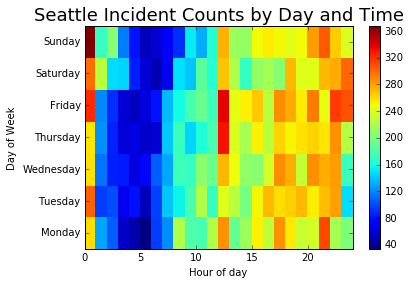

In [291]:
plt.pcolor(seattle_dayTimeHeatmap)
plt.colorbar()
plt.title('Seattle Incident Counts by Day and Time').set_fontsize(18)
plt.xlabel('Hour of day')
plt.ylabel('Day of Week')
tick_pos = [i+0.5 for i in range(7)] 
plt.yticks(tick_pos,weekdays)
plt.xlim([0,24])
plt.show

<function matplotlib.pyplot.show>

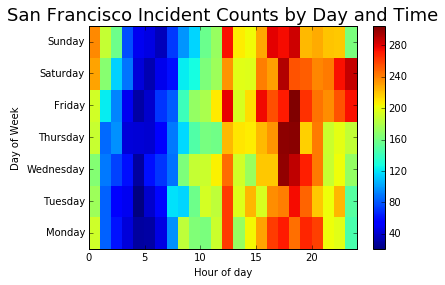

In [292]:
plt.pcolor(sanfran_dayTimeHeatmap)
plt.colorbar()
plt.title('San Francisco Incident Counts by Day and Time').set_fontsize(18)
plt.xlabel('Hour of day')
plt.ylabel('Day of Week')
tick_pos = [i+0.5 for i in range(7)] 
plt.yticks(tick_pos,weekdays)
plt.xlim([0,24])
plt.show

From these plots, you can see the following:
1. Crime is lowest when people are sleeping (1 AM - 7 AM, later on weekend).
2. Crime is highest at lunchtime and efternoons/evenings.
3. On Friday and Saturday nights, crime continues into the early hours of the next morning.
4. The pattern is quite similar for both cities.

Next I wanted to compare crime across different areas of the cities. In order to fairly compare rates of crimes across districts/preceincts, I divided the number of crimes reported by the land area of the district, to get a normalized "incidents per square mile" which could be compared across districts and cities. I also separated out the type of crime to see if some crimes were more common in some areas. 

I felt a stacked bar chart would represent this best.

In [204]:
seattle_byprecinctandtype = (seattle_full.groupby(by=['Summarized Offense Description','Name'])['Summarized Offense Description'].count()/ \
    (seattle_full.groupby(by=['Summarized Offense Description','Name'])['Area'].min())).unstack()

In [217]:
seattle_byprecinctandtype

Name,East,North,South,Southwest,West
Summarized Offense Description,,,,,
ANIMAL COMPLAINT,0.875,1.15625,1.833333,0.526316,1.666667
ASSAULT,57.250,13.84375,19.333333,7.789474,61.333333
BIAS INCIDENT,1.000,NaN,0.666667,0.105263,0.166667
BIKE THEFT,15.625,10.81250,5.666667,2.631579,17.000000
BURGLARY,43.500,42.96875,53.166667,20.368421,38.083333
BURGLARY-SECURE PARKING-RES,11.125,5.59375,0.500000,0.526316,8.666667
CAR PROWL,133.250,57.21875,62.416667,19.210526,183.916667
COUNTERFEIT,3.250,2.84375,1.083333,0.105263,2.250000
DISORDERLY CONDUCT,0.250,NaN,NaN,NaN,NaN


In [226]:
print list(seattle_byprecinctandtype.columns.values)
print list(seattle_byprecinctandtype.index)
print seattle_byprecinctandtype.shape

['East', 'North', 'South', 'Southwest', 'West']
['ANIMAL COMPLAINT', 'ASSAULT', 'BIAS INCIDENT', 'BIKE THEFT', 'BURGLARY', 'BURGLARY-SECURE PARKING-RES', 'CAR PROWL', 'COUNTERFEIT', 'DISORDERLY CONDUCT', 'DISPUTE', 'DISTURBANCE', 'DUI', 'ELUDING', 'EMBEZZLE', 'ESCAPE', 'FALSE REPORT', 'FIREWORK', 'FORGERY', 'FRAUD', 'HOMICIDE', 'ILLEGAL DUMPING', 'INJURY', 'LIQUOR VIOLATION', 'LOST PROPERTY', 'MAIL THEFT', 'NARCOTICS', 'OBSTRUCT', 'OTHER PROPERTY', 'PICKPOCKET', 'PORNOGRAPHY', 'PROPERTY DAMAGE', 'PROSTITUTION', 'PUBLIC NUISANCE', 'PURSE SNATCH', 'RECKLESS BURNING', 'RECOVERED PROPERTY', 'ROBBERY', 'SHOPLIFTING', 'STOLEN PROPERTY', 'THEFT OF SERVICES', 'THREATS', 'TRAFFIC', 'TRESPASS', 'VEHICLE THEFT', 'VIOLATION OF COURT ORDER', 'WARRANT ARREST', 'WEAPON', '[INC - CASE DC USE ONLY]']
(48, 5)


In [275]:
sanfran_byprecinctandtype = (sanfran_full.groupby(by=['Category','Name'])['Category'].count()/ \
    (sanfran_full.groupby(by=['Category','Name'])['Area'].min())).unstack()
sanfran_byprecinctandtype 

Name,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
Category,,,,,,,,,,
ARSON,1.392405,0.555556,0.724638,3.793103,3.214286,0.153846,0.175439,7.586207,0.185185,NaN
ASSAULT,45.443038,153.888889,42.318841,158.275862,106.071429,18.153846,14.210526,182.068966,13.611111,49.846154
BRIBERY,NaN,NaN,0.144928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BURGLARY,NaN,NaN,NaN,0.689655,0.357143,NaN,NaN,NaN,0.185185,0.153846
DISORDERLY CONDUCT,0.379747,0.555556,0.579710,4.137931,0.357143,0.769231,NaN,1.034483,NaN,0.307692
DRIVING UNDER THE INFLUENCE,1.898734,3.333333,1.014493,3.793103,2.857143,0.615385,3.684211,6.206897,0.740741,0.307692
DRUG/NARCOTIC,14.050633,50.555556,11.739130,74.827586,62.142857,9.692308,8.947368,83.448276,2.870370,43.692308
DRUNKENNESS,1.139241,13.333333,1.304348,12.758621,2.857143,1.384615,0.350877,10.689655,0.462963,2.000000
EMBEZZLEMENT,0.379747,1.111111,NaN,NaN,0.357143,NaN,NaN,0.689655,0.092593,0.153846


<function matplotlib.pyplot.show>

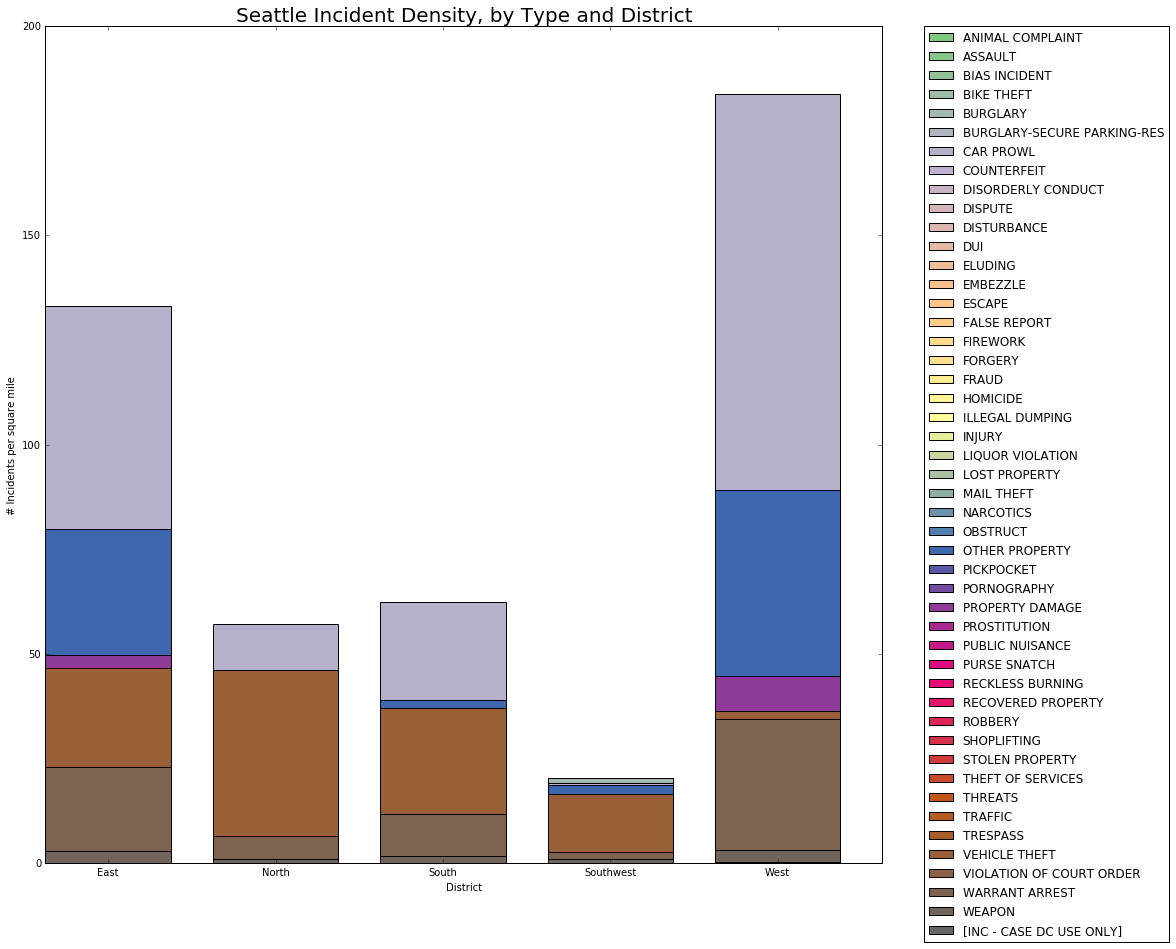

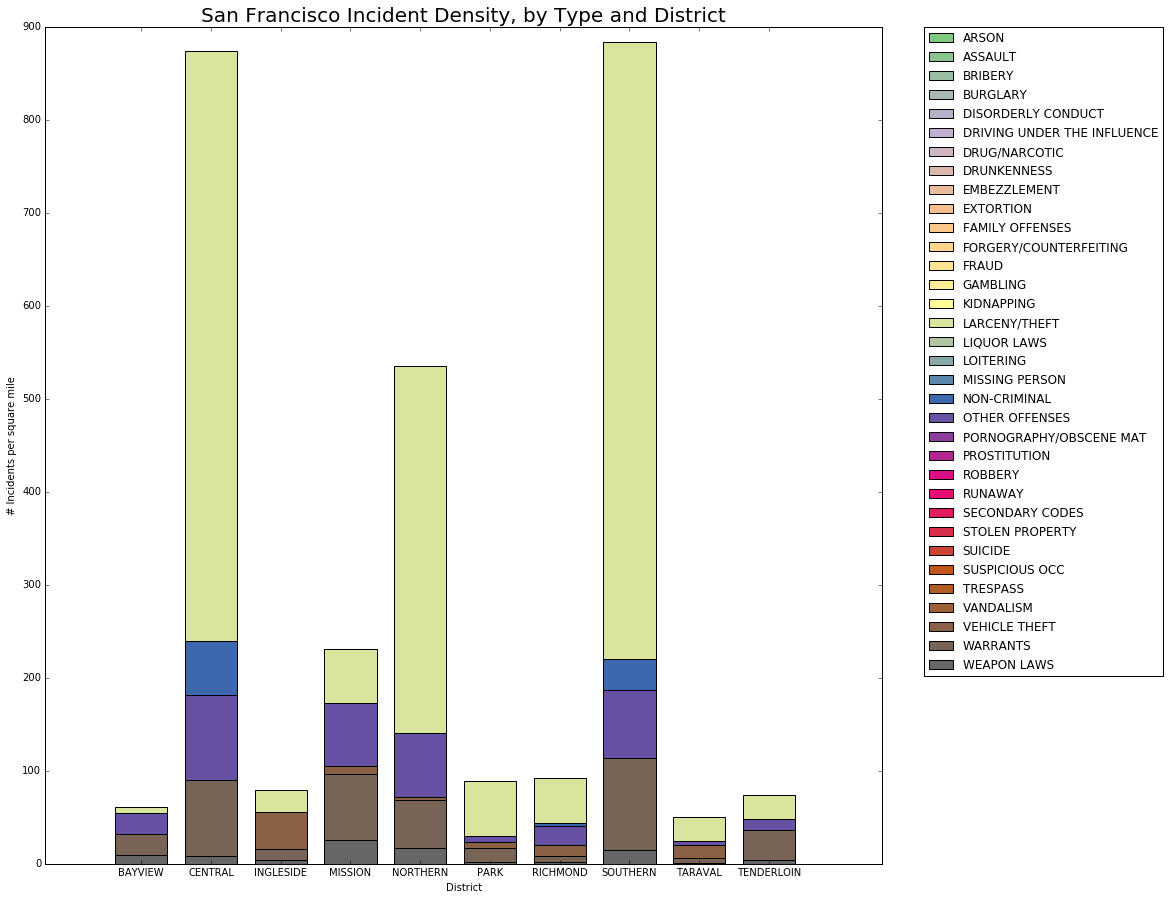

In [278]:
from matplotlib import colors
#Create the general plot and the "subplots" i.e. the bars
f, ax1 = plt.subplots(1, figsize=(15,15))

# Set the bar width
bar_width = 0.75

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(seattle_byprecinctandtype.shape[1])] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

colormap = plt.cm.Accent
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, seattle_byprecinctandtype.shape[0])])

colors = plt.cm.Accent(np.linspace(0,1,seattle_byprecinctandtype.shape[0]))
c= 0
for iCrime in list(seattle_byprecinctandtype.index):
    barcolor = (((c & 0x1C0) << 15) + 0x3F0000) + (((c & 0x38) << 10) + 0x3F00) + (((c & 0x7) << 5) + 0x3F)
    ax1.bar(bar_l, seattle_byprecinctandtype.loc[iCrime,:], width=bar_width, label=iCrime, color=colors[c])
    c +=1 
#     color=colors.colorConverter.to_rgba(hex(barcolor+0x1000000).replace('0x1','#')))
#    c = (c + 1) % 512
#    print hex(barcolor)
# set the x ticks with names
plt.xticks(tick_pos, list(seattle_byprecinctandtype.columns.values))

# Set the label and legends
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Seattle Incident Density, by Type and District').set_fontsize(20)
plt.xlabel('District')
plt.ylabel('# Incidents per square mile')
plt.show

f, ax1 = plt.subplots(1, figsize=(15,15))

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(sanfran_byprecinctandtype.shape[1])] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

colormap = plt.cm.Accent
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, sanfran_byprecinctandtype.shape[0])])

colors = plt.cm.Accent(np.linspace(0,1,sanfran_byprecinctandtype.shape[0]))
c= 0
for iCrime in list(sanfran_byprecinctandtype.index):
    barcolor = (((c & 0x1C0) << 15) + 0x3F0000) + (((c & 0x38) << 10) + 0x3F00) + (((c & 0x7) << 5) + 0x3F)
    ax1.bar(bar_l, sanfran_byprecinctandtype.loc[iCrime,:], width=bar_width, label=iCrime, color=colors[c])
    c +=1 

# set the x ticks with names
plt.xticks(tick_pos, list(sanfran_byprecinctandtype.columns.values))

# Set the label and legends
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('San Francisco Incident Density, by Type and District').set_fontsize(20)
plt.xlabel('District')
plt.ylabel('# Incidents per square mile')
plt.show

These charts show that the "crime density" varies widely across areas of the city. Typically areas closer to downtown appear to have more crime density. It also shows that the nature of the crimes also varies widely across areas.

In doing this analysis it because clear to me that the crimes in Seattle and San Francisco are categorized differenly. So you really cannot reach any conclusions when comparing the counts of different types of cries across cities.